<a href="https://colab.research.google.com/github/d-hackmt/ThunderStrom-Forecasting-ML/blob/main/Agartala_Imd_ANALYSIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# RAW DATA Processing and MERGING as ONE TABLE

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
# Import Index Data from CSV
index_csv_file = '/content/index.csv'
index_df = pd.read_csv(index_csv_file, index_col=False)

# Import Surface Data from CSV
surface_csv_file = '/content/surface.csv'
surface_df = pd.read_csv(surface_csv_file, index_col=False)



In [ ]:
index_df

,YEAR,MONTH,DAY,SWEAT index,Showalter index,LIFTED index,K index,Cross totals index,Vertical totals index,Totals totals index,TLCL,PLCL,CINE,CAPE,PRECIPITABLE WATER,1000-500 THICKNESS
0,1981,1,1,70.3,13.0,15.4,6.4,11.9,21.5,33.4,282.60,1005.11,0.0,0.0,14.2,5652
1,1981,1,2,85.4,10.6,11.8,4.6,8.2,22.1,30.3,281.59,945.42,0.0,0.0,13.5,5612
2,1981,1,3,68.1,13.4,15.1,5.6,13.9,22.1,36.0,281.84,979.05,0.0,0.0,16.8,5629
3,1981,1,4,79.5,9.7,12.6,5.3,9.0,19.3,28.3,279.22,940.57,0.0,0.0,10.1,5533
4,1981,1,5,50.4,7.0,8.0,18.6,13.4,28.1,41.5,283.01,973.98,0.0,0.0,17.3,5590
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9377,2020,9,26,309.3,6.4,-3.0,43.6,23.0,23.1,46.1,298.63,982.47,-33.1,988.0,82.4,5845
9378,2020,9,27,297.7,7.9,-0.9,36.1,21.4,22.6,44.0,297.26,966.72,-121.6,415.9,73.9,5861
9379,2020,9,28,269.8,8.0,-1.5,39.9,21.1,21.3,42.4,298.56,985.03,-8.4,1.8,78.2,5858
9380,2020,9,29,261.4,7.2,-4.2,43.1,21.8,22.0,43.8,299.26,941.06,-12.9,3456.3,73.2,5876


In [ ]:
surface_df

,YEAR,MONTH,DAY,MAXT,MINT,TH
0,1981,1,1,26.6,9.5,0
1,1981,1,2,25.6,8.3,0
2,1981,1,3,25.7,8.9,0
3,1981,1,4,26.1,8.6,0
4,1981,1,5,25.6,10.4,0
...,...,...,...,...,...,...
11270,2020,12,27,25.8,10.4,0
11271,2020,12,28,25.6,10.6,0
11272,2020,12,29,25.0,10.4,0
11273,2020,12,30,24.9,10.2,0


COUNT OF TH BEFORE MERGING

In [ ]:
th_counts = surface_df['TH'].value_counts()
print(th_counts)


0    8818
1    2457
Name: TH, dtype: int64


# MERGING

In [ ]:
index_df.describe()

,YEAR,MONTH,DAY,SWEAT index,Showalter index,LIFTED index,K index,Cross totals index,Vertical totals index,Totals totals index,TLCL,PLCL,CINE,CAPE,PRECIPITABLE WATER,1000-500 THICKNESS
count,9382.000000,9382.000000,9382.000000,9382.000000,9382.000000,9382.000000,9382.000000,9382.000000,9382.000000,9382.000000,9382.000000,9382.000000,9382.000000,9382.000000,9382.000000,9382.000000
mean,1995.754850,6.507355,15.670539,192.293498,7.546941,1.283777,23.841771,16.629152,23.503326,40.132477,292.787681,965.682197,-61.120401,560.199169,43.175741,5746.287785
std,9.469953,3.372749,8.859783,97.606416,4.400006,6.780747,17.204377,7.068990,3.550596,9.128024,5.838665,29.989287,575.549377,1149.547723,18.567345,79.582727
min,1981.000000,1.000000,1.000000,7.800000,-12.300000,-20.700000,-68.200000,-58.100000,7.500000,-37.800000,261.040000,50.000000,-28808.900000,0.000000,0.000000,5461.000000
25%,1988.000000,4.000000,8.000000,111.500000,4.800000,-3.200000,12.800000,13.100000,21.500000,35.600000,288.662500,952.680000,-61.600000,0.000000,26.800000,5688.000000
50%,1995.000000,6.000000,16.000000,204.000000,7.200000,-0.400000,29.400000,18.700000,23.300000,41.800000,294.910000,973.130000,-9.500000,18.400000,42.600000,5755.000000
75%,2003.000000,9.000000,23.000000,259.000000,10.000000,4.500000,36.900000,21.500000,25.700000,46.000000,297.270000,985.090000,0.000000,625.600000,58.200000,5807.000000
max,2020.000000,12.000000,31.000000,678.700000,28.900000,30.600000,53.900000,33.500000,37.900000,68.600000,400.300000,1015.980000,1430.500000,37945.800000,109.800000,6005.000000


In [ ]:
surface_df.describe()

,YEAR,MONTh,DAY,MAXT,MINT,TH
count,11275.000000,11275.000000,11275.000000,11248.000000,11195.000000,11275.000000
mean,2000.009667,6.549889,15.740488,30.687651,20.293542,0.217916
std,12.345996,3.461856,8.799658,3.427180,5.682633,0.412848
min,1981.000000,1.000000,1.000000,14.800000,3.300000,0.000000
25%,1988.000000,4.000000,8.000000,28.600000,15.500000,0.000000
50%,2001.000000,7.000000,16.000000,31.300000,22.400000,0.000000
75%,2012.000000,10.000000,23.000000,33.200000,25.000000,0.000000
max,2020.000000,12.000000,31.000000,39.500000,30.800000,1.000000


In [ ]:
import pandas as pd

# Assuming you have two dataframes: index_df and surface_df

# Concatenate the columns and create a new "Date" column
index_df['Date'] = pd.to_datetime(index_df[['YEAR', 'MONTH', 'DAY']]).dt.strftime('%d/%m/%Y')
surface_df['Date'] = pd.to_datetime(surface_df[['YEAR', 'MONTH', 'DAY']]).dt.strftime('%d/%m/%Y')




Coverting dates into date

In [ ]:
index_df

,YEAR,MONTH,DAY,SWEAT index,Showalter index,LIFTED index,K index,Cross totals index,Vertical totals index,Totals totals index,TLCL,PLCL,CINE,CAPE,PRECIPITABLE WATER,1000-500 THICKNESS,Date
0,1981,1,1,70.3,13.0,15.4,6.4,11.9,21.5,33.4,282.60,1005.11,0.0,0.0,14.2,5652,01/01/1981
1,1981,1,2,85.4,10.6,11.8,4.6,8.2,22.1,30.3,281.59,945.42,0.0,0.0,13.5,5612,02/01/1981
2,1981,1,3,68.1,13.4,15.1,5.6,13.9,22.1,36.0,281.84,979.05,0.0,0.0,16.8,5629,03/01/1981
3,1981,1,4,79.5,9.7,12.6,5.3,9.0,19.3,28.3,279.22,940.57,0.0,0.0,10.1,5533,04/01/1981
4,1981,1,5,50.4,7.0,8.0,18.6,13.4,28.1,41.5,283.01,973.98,0.0,0.0,17.3,5590,05/01/1981
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9377,2020,9,26,309.3,6.4,-3.0,43.6,23.0,23.1,46.1,298.63,982.47,-33.1,988.0,82.4,5845,26/09/2020
9378,2020,9,27,297.7,7.9,-0.9,36.1,21.4,22.6,44.0,297.26,966.72,-121.6,415.9,73.9,5861,27/09/2020
9379,2020,9,28,269.8,8.0,-1.5,39.9,21.1,21.3,42.4,298.56,985.03,-8.4,1.8,78.2,5858,28/09/2020
9380,2020,9,29,261.4,7.2,-4.2,43.1,21.8,22.0,43.8,299.26,941.06,-12.9,3456.3,73.2,5876,29/09/2020


In [ ]:
surface_df

,YEAR,MONTH,DAY,MAXT,MINT,TH,Date
0,1981,1,1,26.6,9.5,0,01/01/1981
1,1981,1,2,25.6,8.3,0,02/01/1981
2,1981,1,3,25.7,8.9,0,03/01/1981
3,1981,1,4,26.1,8.6,0,04/01/1981
4,1981,1,5,25.6,10.4,0,05/01/1981
...,...,...,...,...,...,...,...
11270,2020,12,27,25.8,10.4,0,27/12/2020
11271,2020,12,28,25.6,10.6,0,28/12/2020
11272,2020,12,29,25.0,10.4,0,29/12/2020
11273,2020,12,30,24.9,10.2,0,30/12/2020


In [ ]:
columns_to_drop = ['DAY','MONTH','YEAR']
surface_df.drop(columns=columns_to_drop, inplace=True)
index_df.drop(columns=columns_to_drop, inplace=True)


In [ ]:
merged_df = pd.merge(index_df, surface_df, on='Date', how='inner')

In [ ]:
merged_df.to_csv('merged_df_all12.csv', index=False)

# Importing merged_df

In [ ]:
import pandas as pd

# Read the CSV file into a DataFrame
merged_df = pd.read_csv('merged_df_all12a.csv')

# Perform operations on the DataFrame
# For example, you can display the first few rows
print(merged_df.head())


       Date  SWEAT index  Showalter index  LIFTED index  K index  \
0  1/1/1981         70.3             13.0          15.4      6.4   
1  2/1/1981         85.4             10.6          11.8      4.6   
2  3/1/1981         68.1             13.4          15.1      5.6   
3  4/1/1981         79.5              9.7          12.6      5.3   
4  5/1/1981         50.4              7.0           8.0     18.6   

   Cross totals index  Vertical totals index  Totals totals index    TLCL  \
0                11.9                   21.5                 33.4  282.60   
1                 8.2                   22.1                 30.3  281.59   
2                13.9                   22.1                 36.0  281.84   
3                 9.0                   19.3                 28.3  279.22   
4                13.4                   28.1                 41.5  283.01   

      PLCL  CINE  CAPE  PRECIPITABLE WATER  1000-500 THICKNESS  MAXT  MINT  TH  
0  1005.11   0.0   0.0                14.2     

In [ ]:
merged_df

,Date,SWEAT index,Showalter index,LIFTED index,K index,Cross totals index,Vertical totals index,Totals totals index,TLCL,PLCL,CINE,CAPE,PRECIPITABLE WATER,1000-500 THICKNESS,MAXT,MINT,TH
0,1/1/1981,70.3,13.0,15.4,6.4,11.9,21.5,33.4,282.60,1005.11,0.0,0.0,14.2,5652,26.6,9.5,0
1,2/1/1981,85.4,10.6,11.8,4.6,8.2,22.1,30.3,281.59,945.42,0.0,0.0,13.5,5612,25.6,8.3,0
2,3/1/1981,68.1,13.4,15.1,5.6,13.9,22.1,36.0,281.84,979.05,0.0,0.0,16.8,5629,25.7,8.9,0
3,4/1/1981,79.5,9.7,12.6,5.3,9.0,19.3,28.3,279.22,940.57,0.0,0.0,10.1,5533,26.1,8.6,0
4,5/1/1981,50.4,7.0,8.0,18.6,13.4,28.1,41.5,283.01,973.98,0.0,0.0,17.3,5590,25.6,10.4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6837,25/05/2020,431.0,3.9,-5.1,39.9,24.2,24.4,48.6,297.57,946.95,-41.2,7.0,67.1,5841,34.8,27.7,0
6838,28/05/2020,324.3,6.0,-0.5,43.3,23.1,28.2,51.3,294.00,972.52,-270.5,42.4,56.9,5794,27.0,21.2,0
6839,29/05/2020,242.7,5.3,-2.6,42.0,23.0,24.4,47.4,296.12,969.59,-69.0,547.8,62.7,5787,32.8,24.0,1
6840,30/05/2020,292.2,5.0,-2.6,43.5,24.8,25.4,50.2,296.00,961.44,-91.8,123.6,55.1,5778,30.9,22.0,1


In [ ]:
merged_df.describe()

,SWEAT index,Showalter index,LIFTED index,K index,Cross totals index,Vertical totals index,Totals totals index,TLCL,PLCL,CINE,CAPE,PRECIPITABLE WATER,1000-500 THICKNESS,MAXT,MINT,TH
count,6842.000000,6842.000000,6842.000000,6842.000000,6842.000000,6842.000000,6842.000000,6842.000000,6842.000000,6842.000000,6842.000000,6842.000000,6842.000000,6817.000000,6769.000000,6842.000000
mean,190.921207,7.949752,1.799094,24.612511,16.526717,23.379202,39.905919,292.501216,965.881008,-64.903259,463.251608,42.833864,5748.081847,30.616606,20.252223,0.229027
std,98.417344,4.314500,6.776094,15.559148,6.945574,3.515765,9.047663,5.891631,30.091135,671.273011,990.115090,18.527751,80.119840,3.238873,5.604492,0.420237
min,7.800000,-6.200000,-14.600000,-60.900000,-18.200000,7.500000,0.900000,261.040000,50.000000,-28808.900000,0.000000,0.000000,5461.000000,15.500000,4.100000,0.000000
25%,108.100000,5.200000,-2.800000,13.400000,12.900000,21.300000,35.200000,288.082500,952.770000,-61.175000,0.000000,26.500000,5689.000000,28.600000,16.000000,0.000000
50%,202.300000,7.500000,0.000000,29.300000,18.500000,23.300000,41.600000,294.600000,973.415000,-6.400000,12.200000,41.600000,5757.000000,31.200000,22.400000,0.000000
75%,259.600000,10.300000,5.200000,37.100000,21.300000,25.500000,45.800000,297.110000,985.090000,0.000000,527.225000,57.800000,5809.000000,33.000000,25.000000,0.000000
max,678.700000,28.900000,30.600000,51.700000,33.500000,37.700000,68.600000,400.300000,1015.980000,1430.500000,37945.800000,109.800000,6005.000000,39.500000,30.800000,1.000000


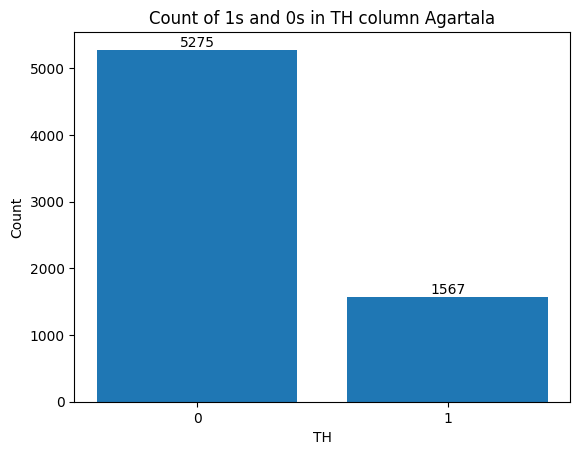

In [ ]:


import matplotlib.pyplot as plt

th_counts = merged_df['TH'].value_counts()

# Plotting the counts
plt.bar(th_counts.index, th_counts.values)

# Adding labels and title
plt.xlabel('TH')
plt.ylabel('Count')
plt.title('Count of 1s and 0s in TH column Agartala')

# Customizing x-axis tick labels
plt.xticks([0, 1], ['0', '1'])

# Adding count labels on top of each bar
for i, count in enumerate(th_counts.values):
    plt.text(i, count, str(count), ha='center', va='bottom')

# Display the plot
plt.show()

In [ ]:
merged_df.drop(['MAXT', 'MINT'], axis=1, inplace=True)

# Combining

In [ ]:
# Combine variables and create new features
merged_df['Environmental_Stability'] = merged_df['Showalter index'] + merged_df['LIFTED index']
merged_df['Moisture_Indices'] = merged_df['PRECIPITABLE WATER']
merged_df['Convective_Potential'] = merged_df['CAPE'] + merged_df['CINE']
merged_df['Temperature_Pressure'] = merged_df['1000-500 THICKNESS']
merged_df['Moisture_Temperature_Profiles'] = merged_df['PLCL']

# Drop the original variables
merged_df.drop(['Showalter index', 'LIFTED index', 'PRECIPITABLE WATER', 'Cross totals index', 'Vertical totals index', 'CAPE', 'CINE', '1000-500 THICKNESS', 'TLCL', 'PLCL'], axis=1, inplace=True)


In [ ]:
merged_df

,Date,SWEAT index,K index,Totals totals index,TH,Environmental_Stability,Moisture_Indices,Convective_Potential,Temperature_Pressure,Moisture_Temperature_Profiles
0,1/1/1981,70.3,6.4,33.4,0,28.4,14.2,0.0,5652,1005.11
1,2/1/1981,85.4,4.6,30.3,0,22.4,13.5,0.0,5612,945.42
2,3/1/1981,68.1,5.6,36.0,0,28.5,16.8,0.0,5629,979.05
3,4/1/1981,79.5,5.3,28.3,0,22.3,10.1,0.0,5533,940.57
4,5/1/1981,50.4,18.6,41.5,0,15.0,17.3,0.0,5590,973.98
...,...,...,...,...,...,...,...,...,...,...
6837,25/05/2020,431.0,39.9,48.6,0,-1.2,67.1,-34.2,5841,946.95
6838,28/05/2020,324.3,43.3,51.3,0,5.5,56.9,-228.1,5794,972.52
6839,29/05/2020,242.7,42.0,47.4,1,2.7,62.7,478.8,5787,969.59
6840,30/05/2020,292.2,43.5,50.2,1,2.4,55.1,31.8,5778,961.44


In [ ]:
# Get the column names
columns = list(merged_df.columns)

# Remove the 'TH' column from the list
columns.remove('TH')

# Append the 'TH' column at the end of the list
columns.append('TH')

# Reorder the columns in the DataFrame
merged_df = merged_df[columns]


In [ ]:
merged_df

,Date,SWEAT index,K index,Totals totals index,Environmental_Stability,Moisture_Indices,Convective_Potential,Temperature_Pressure,Moisture_Temperature_Profiles,TH
0,1/1/1981,70.3,6.4,33.4,28.4,14.2,0.0,5652,1005.11,0
1,2/1/1981,85.4,4.6,30.3,22.4,13.5,0.0,5612,945.42,0
2,3/1/1981,68.1,5.6,36.0,28.5,16.8,0.0,5629,979.05,0
3,4/1/1981,79.5,5.3,28.3,22.3,10.1,0.0,5533,940.57,0
4,5/1/1981,50.4,18.6,41.5,15.0,17.3,0.0,5590,973.98,0
...,...,...,...,...,...,...,...,...,...,...
6837,25/05/2020,431.0,39.9,48.6,-1.2,67.1,-34.2,5841,946.95,0
6838,28/05/2020,324.3,43.3,51.3,5.5,56.9,-228.1,5794,972.52,0
6839,29/05/2020,242.7,42.0,47.4,2.7,62.7,478.8,5787,969.59,1
6840,30/05/2020,292.2,43.5,50.2,2.4,55.1,31.8,5778,961.44,1


In [ ]:
merged_df.describe()

,SWEAT index,K index,Totals totals index,Environmental_Stability,Moisture_Indices,Convective_Potential,Temperature_Pressure,Moisture_Temperature_Profiles,TH
count,6842.000000,6842.000000,6842.000000,6842.000000,6842.000000,6842.000000,6842.000000,6842.000000,6842.000000
mean,190.921207,24.612511,39.905919,9.748845,42.833864,398.348348,5748.081847,965.881008,0.229027
std,98.417344,15.559148,9.047663,10.697144,18.527751,1211.315576,80.119840,30.091135,0.420237
min,7.800000,-60.900000,0.900000,-20.200000,0.000000,-28808.400000,5461.000000,50.000000,0.000000
25%,108.100000,13.400000,35.200000,2.800000,26.500000,0.000000,5689.000000,952.770000,0.000000
50%,202.300000,29.300000,41.600000,7.600000,41.600000,0.000000,5757.000000,973.415000,0.000000
75%,259.600000,37.100000,45.800000,14.900000,57.800000,470.600000,5809.000000,985.090000,0.000000
max,678.700000,51.700000,68.600000,59.500000,109.800000,39376.300000,6005.000000,1015.980000,1.000000


In [ ]:
merged_df.to_csv('merged_df_all12a_combined.csv', index=False)

# COMBINED IMPORT

In [ ]:
import pandas as pd

# Read the CSV file into a DataFrame
merged_df = pd.read_csv('merged_df_all12a_combined.csv')

# Perform operations on the DataFrame
# For example, you can display the first few rows
print(merged_df.head())


       Date  SWEAT index  K index  Totals totals index  \
0  1/1/1981         70.3      6.4                 33.4   
1  2/1/1981         85.4      4.6                 30.3   
2  3/1/1981         68.1      5.6                 36.0   
3  4/1/1981         79.5      5.3                 28.3   
4  5/1/1981         50.4     18.6                 41.5   

   Environmental_Stability  Moisture_Indices  Convective_Potential  \
0                     28.4              14.2                   0.0   
1                     22.4              13.5                   0.0   
2                     28.5              16.8                   0.0   
3                     22.3              10.1                   0.0   
4                     15.0              17.3                   0.0   

   Temperature_Pressure  Moisture_Temperature_Profiles  TH  
0                  5652                        1005.11   0  
1                  5612                         945.42   0  
2                  5629                        

# 3 months model

In [ ]:
# Convert the 'Date' column to datetime format
merged_df['Date'] = pd.to_datetime(merged_df['Date'])

# Extract the month from the 'Date' column
merged_df['Month'] = merged_df['Date'].dt.month

# Filter the data for the desired months (March, April, May)
filtered_df = merged_df[merged_df['Month'].isin([3, 4, 5])]

# Drop the 'Date' and 'Month' columns since they are no longer needed
filtered_df = filtered_df.drop(['Month'], axis=1)
filtered_df


<ipython-input-2-0ba02b849609>:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  merged_df['Date'] = pd.to_datetime(merged_df['Date'])


,Date,SWEAT index,K index,Totals totals index,Environmental_Stability,Moisture_Indices,Convective_Potential,Temperature_Pressure,Moisture_Temperature_Profiles,TH
2,1981-03-01,68.1,5.6,36.0,28.5,16.8,0.0,5629,979.05,0
3,1981-04-01,79.5,5.3,28.3,22.3,10.1,0.0,5533,940.57,0
4,1981-05-01,50.4,18.6,41.5,15.0,17.3,0.0,5590,973.98,0
33,1981-03-02,87.0,13.8,29.0,25.1,25.6,0.0,5636,971.24,0
34,1981-04-02,75.7,11.8,25.1,29.1,20.7,0.0,5647,961.62,0
...,...,...,...,...,...,...,...,...,...,...
6837,2020-05-25,431.0,39.9,48.6,-1.2,67.1,-34.2,5841,946.95,0
6838,2020-05-28,324.3,43.3,51.3,5.5,56.9,-228.1,5794,972.52,0
6839,2020-05-29,242.7,42.0,47.4,2.7,62.7,478.8,5787,969.59,1
6840,2020-05-30,292.2,43.5,50.2,2.4,55.1,31.8,5778,961.44,1


In [ ]:
filtered_df = filtered_df.drop(['Date'], axis=1)

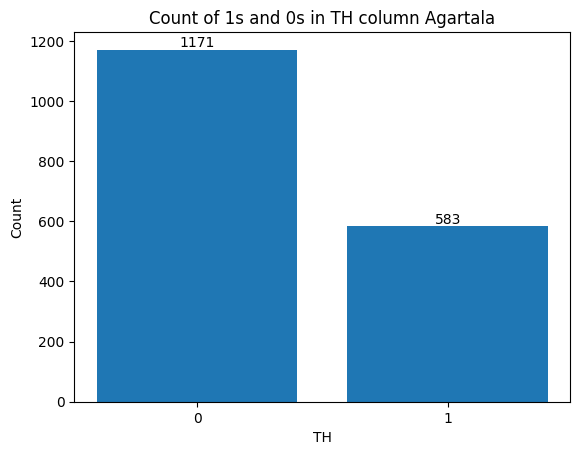

In [ ]:
import matplotlib.pyplot as plt

th_counts = filtered_df['TH'].value_counts()

# Plotting the counts
plt.bar(th_counts.index, th_counts.values)

# Adding labels and title
plt.xlabel('TH')
plt.ylabel('Count')
plt.title('Count of 1s and 0s in TH column Agartala')

# Customizing x-axis tick labels
plt.xticks([0, 1], ['0', '1'])

# Adding count labels on top of each bar
for i, count in enumerate(th_counts.values):
    plt.text(i, count, str(count), ha='center', va='bottom')

# Display the plot
plt.show()

### RANDOM FOREST CLASSFIER

In [ ]:
import pandas as pd
import numpy as np
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Separate the independent and dependent variables
X = filtered_df[['SWEAT index', 'K index', 'Totals totals index', 'Environmental_Stability',
               'Moisture_Indices', 'Convective_Potential', 'Temperature_Pressure',
               'Moisture_Temperature_Profiles']]
y = filtered_df['TH']

# Perform SMOTE oversampling to balance the dataset
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X, y)

# Split the resampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Create the Random Forest Classifier model
model = RandomForestClassifier()

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Calculate the evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

# Calculate additional performance metrics
total_positives = cm[1].sum()
total_negatives = cm[0].sum()
true_positives = cm[1][1]
false_positives = cm[0][1]
false_negatives = cm[1][0]
true_negatives = cm[0][0]

pod = true_positives / total_positives  # Probability of Detection
far = false_positives / total_negatives  # False Alarm Rate
hss = 2 * ((true_positives * true_negatives) - (false_positives * false_negatives)) / (
        (true_positives + false_negatives) * (false_positives + true_negatives) +
        (true_positives + false_positives) * (false_negatives + true_negatives))  # Heidke Skill Score
csi = true_positives / (true_positives + false_positives + false_negatives)  # Critical Success Index

# Print the evaluation metrics and additional performance metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("Probability of Detection (POD):", pod)
print("False Alarm Rate (FAR):", far)
print("Heidke Skill Score (HSS):", hss)
print("Critical Success Index (CSI):", csi)

import joblib
import sklearn

# Save the trained model with scikit-learn version
joblib.dump(model, 'random_forest_model.pkl', protocol=sklearn.config_context(assume_finite=True).__dict__)


Accuracy: 0.7313432835820896
Precision: 0.7113821138211383
Recall: 0.7608695652173914
F1-score: 0.7352941176470589
Probability of Detection (POD): 0.7608695652173914
False Alarm Rate (FAR): 0.29707112970711297
Heidke Skill Score (HSS): 0.46427140619878354
Critical Success Index (CSI): 0.5813953488372093


TypeError: ignored

In [ ]:
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Make predictions on the entire dataset
predictions = model.predict(X)

# Convert predictions to 1D array and apply the threshold
predictions = np.where(predictions.flatten() > 0.6, 1, 0)

# Create a new DataFrame with the original features, true labels, and predicted labels
result_df = pd.DataFrame(data=X, columns=X.columns)
result_df['True Label'] = y
result_df['Predicted Label'] = predictions

# Get the true labels and predicted labels
true_labels = result_df['True Label']
predicted_labels = result_df['Predicted Label']

# Create the confusion matrix
confusion_mat = confusion_matrix(true_labels, predicted_labels)

# Set the figure size
plt.figure(figsize=(6, 4))

# Plot the confusion matrix as a heatmap
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues')

# Set the labels and title
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')

# Show the plot
plt.show()


### XG BOOST

In [ ]:
import pandas as pd
import numpy as np
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Separate the independent and dependent variables
X = filtered_df[['SWEAT index', 'K index', 'Totals totals index', 'Environmental_Stability',
               'Moisture_Indices', 'Convective_Potential', 'Temperature_Pressure',
               'Moisture_Temperature_Profiles']]
y = filtered_df['TH']

# Perform SMOTE oversampling to balance the dataset
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X, y)

# Split the resampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Create the XGBoost Classifier model
model = XGBClassifier()

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Calculate the evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

# Calculate additional performance metrics
total_positives = cm[1].sum()
total_negatives = cm[0].sum()
true_positives = cm[1][1]
false_positives = cm[0][1]
false_negatives = cm[1][0]
true_negatives = cm[0][0]

pod = true_positives / total_positives  # Probability of Detection
far = false_positives / total_negatives  # False Alarm Rate
hss = 2 * ((true_positives * true_negatives) - (false_positives * false_negatives)) / (
        (true_positives + false_negatives) * (false_positives + true_negatives) +
        (true_positives + false_positives) * (false_negatives + true_negatives))  # Heidke Skill Score
csi = true_positives / (true_positives + false_positives + false_negatives)  # Critical Success Index

# Print the evaluation metrics and additional performance metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("Probability of Detection (POD):", pod)
print("False Alarm Rate (FAR):", far)
print("Heidke Skill Score (HSS):", hss)
print("Critical Success Index (CSI):", csi)


In [ ]:
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Make predictions on the entire dataset
predictions = model.predict(X)

# Convert predictions to 1D array and apply the threshold
predictions = np.where(predictions.flatten() > 0.6, 1, 0)

# Create a new DataFrame with the original features, true labels, and predicted labels
result_df = pd.DataFrame(data=X, columns=X.columns)
result_df['True Label'] = y
result_df['Predicted Label'] = predictions

# Get the true labels and predicted labels
true_labels = result_df['True Label']
predicted_labels = result_df['Predicted Label']

# Create the confusion matrix
confusion_mat = confusion_matrix(true_labels, predicted_labels)

# Set the figure size
plt.figure(figsize=(6, 4))

# Plot the confusion matrix as a heatmap
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues')

# Set the labels and title
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')

# Show the plot
plt.show()


### SVM

In [ ]:
import pandas as pd
import numpy as np
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Separate the independent and dependent variables
X = filtered_df[['SWEAT index', 'K index', 'Totals totals index', 'Environmental_Stability',
               'Moisture_Indices', 'Convective_Potential', 'Temperature_Pressure',
               'Moisture_Temperature_Profiles']]
y = filtered_df['TH']

# Perform SMOTE oversampling to balance the dataset
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X, y)

# Split the resampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Create the SVM Classifier model
model = SVC()

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Calculate the evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

# Calculate additional performance metrics
total_positives = cm[1].sum()
total_negatives = cm[0].sum()
true_positives = cm[1][1]
false_positives = cm[0][1]
false_negatives = cm[1][0]
true_negatives = cm[0][0]

pod = true_positives / total_positives  # Probability of Detection
far = false_positives / total_negatives  # False Alarm Rate
hss = 2 * ((true_positives * true_negatives) - (false_positives * false_negatives)) / (
        (true_positives + false_negatives) * (false_positives + true_negatives) +
        (true_positives + false_positives) * (false_negatives + true_negatives))  # Heidke Skill Score
csi = true_positives / (true_positives + false_positives + false_negatives)  # Critical Success Index

# Print the evaluation metrics and additional performance metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("Probability of Detection (POD):", pod)
print("False Alarm Rate (FAR):", far)
print("Heidke Skill Score (HSS):", hss)
print("Critical Success Index (CSI):", csi)


In [ ]:
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Make predictions on the entire dataset
predictions = model.predict(X)

# Convert predictions to 1D array and apply the threshold
predictions = np.where(predictions.flatten() > 0.6, 1, 0)

# Create a new DataFrame with the original features, true labels, and predicted labels
result_df = pd.DataFrame(data=X, columns=X.columns)
result_df['True Label'] = y
result_df['Predicted Label'] = predictions

# Get the true labels and predicted labels
true_labels = result_df['True Label']
predicted_labels = result_df['Predicted Label']

# Create the confusion matrix
confusion_mat = confusion_matrix(true_labels, predicted_labels)

# Set the figure size
plt.figure(figsize=(6, 4))

# Plot the confusion matrix as a heatmap
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues')

# Set the labels and title
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')

# Show the plot
plt.show()


### LOGISTIC REGRESSION

In [ ]:
import pandas as pd
import numpy as np
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Separate the independent and dependent variables
X = filtered_df[['SWEAT index', 'K index', 'Totals totals index', 'Environmental_Stability',
               'Moisture_Indices', 'Convective_Potential', 'Temperature_Pressure',
               'Moisture_Temperature_Profiles']]
y = filtered_df['TH']

# Perform SMOTE oversampling to balance the dataset
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X, y)

# Split the resampled data into training and testing sets with stratified sampling
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, stratify=y_resampled, random_state=42)

# Create the Logistic Regression Classifier model
model = LogisticRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Calculate the evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

# Calculate additional performance metrics
total_positives = cm[1].sum()
total_negatives = cm[0].sum()
true_positives = cm[1][1]
false_positives = cm[0][1]
false_negatives = cm[1][0]
true_negatives = cm[0][0]

pod = true_positives / total_positives  # Probability of Detection
far = false_positives / total_negatives  # False Alarm Rate
hss = 2 * ((true_positives * true_negatives) - (false_positives * false_negatives)) / (
        (true_positives + false_negatives) * (false_positives + true_negatives) +
        (true_positives + false_positives) * (false_negatives + true_negatives))  # Heidke Skill Score
csi = true_positives / (true_positives + false_positives + false_negatives)  # Critical Success Index

# Print the evaluation metrics and additional performance metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("Probability of Detection (POD):", pod)
print("False Alarm Rate (FAR):", far)
print("Heidke Skill Score (HSS):", hss)
print("Critical Success Index (CSI):", csi)


In [ ]:
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Make predictions on the entire dataset
predictions = model.predict(X)

# Convert predictions to 1D array and apply the threshold
predictions = np.where(predictions.flatten() > 0.6, 1, 0)

# Create a new DataFrame with the original features, true labels, and predicted labels
result_df = pd.DataFrame(data=X, columns=X.columns)
result_df['True Label'] = y
result_df['Predicted Label'] = predictions

# Get the true labels and predicted labels
true_labels = result_df['True Label']
predicted_labels = result_df['Predicted Label']

# Create the confusion matrix
confusion_mat = confusion_matrix(true_labels, predicted_labels)

# Set the figure size
plt.figure(figsize=(6, 4))

# Plot the confusion matrix as a heatmap
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues')

# Set the labels and title
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')

# Show the plot
plt.show()


## TESSTTTTTTT

In [ ]:
import numpy as np
from sklearn.preprocessing import StandardScaler

# Define the input values for prediction
input_values = np.array([[349.7, 28.6, 55.6, -3.4, 84.3, 1376.8, 5642, 1266.23]])

# Create a StandardScaler object
# scaler = StandardScaler()

# # Fit the scaler on the training data
# scaler.fit(X_train)

# # Standardize the input values using the scaler
# input_values_scaled = scaler.transform(input_values)

# Make predictions on the scaled input values
prediction = model.predict(input_values)
print(prediction)


In [ ]:
result_df

# FULL YEAR MODELS

In [ ]:
merged_df = merged_df.drop(['Date'], axis=1)

In [ ]:
import pandas as pd
import numpy as np
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Separate the independent and dependent variables
X = merged_df[['SWEAT index', 'K index', 'Totals totals index', 'Environmental_Stability',
               'Moisture_Indices', 'Convective_Potential', 'Temperature_Pressure',
               'Moisture_Temperature_Profiles']]
y = merged_df['TH']

# Perform SMOTE oversampling to balance the dataset
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X, y)

# Split the resampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Create the Random Forest Classifier model
model = RandomForestClassifier()

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Calculate the evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

# Calculate additional performance metrics
total_positives = cm[1].sum()
total_negatives = cm[0].sum()
true_positives = cm[1][1]
false_positives = cm[0][1]
false_negatives = cm[1][0]
true_negatives = cm[0][0]

pod = true_positives / total_positives  # Probability of Detection
far = false_positives / total_negatives  # False Alarm Rate
hss = 2 * ((true_positives * true_negatives) - (false_positives * false_negatives)) / (
        (true_positives + false_negatives) * (false_positives + true_negatives) +
        (true_positives + false_positives) * (false_negatives + true_negatives))  # Heidke Skill Score
csi = true_positives / (true_positives + false_positives + false_negatives)  # Critical Success Index

# Print the evaluation metrics and additional performance metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("Probability of Detection (POD):", pod)
print("False Alarm Rate (FAR):", far)
print("Heidke Skill Score (HSS):", hss)
print("Critical Success Index (CSI):", csi)


Accuracy: 0.8004739336492891
Precision: 0.7550525464834277
Recall: 0.8878326996197718
F1-score: 0.8160768894713849
Probability of Detection (POD): 0.8878326996197718
False Alarm Rate (FAR): 0.28638941398865786
Heidke Skill Score (HSS): 0.6105256149685556
Critical Success Index (CSI): 0.6892988929889299


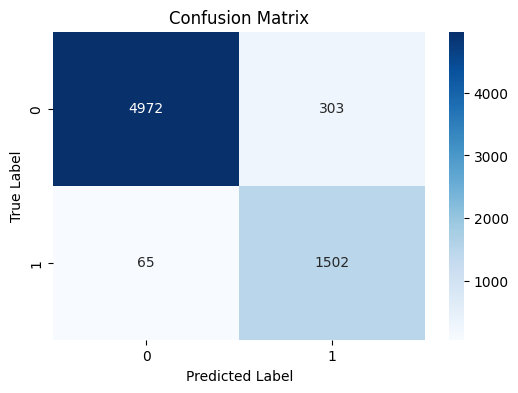

In [ ]:
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Make predictions on the entire dataset
predictions = model.predict(X)

# Convert predictions to 1D array and apply the threshold
predictions = np.where(predictions.flatten() > 0.6, 1, 0)

# Create a new DataFrame with the original features, true labels, and predicted labels
result_df = pd.DataFrame(data=X, columns=X.columns)
result_df['True Label'] = y
result_df['Predicted Label'] = predictions

# Get the true labels and predicted labels
true_labels = result_df['True Label']
predicted_labels = result_df['Predicted Label']

# Create the confusion matrix
confusion_mat = confusion_matrix(true_labels, predicted_labels)

# Set the figure size
plt.figure(figsize=(6, 4))

# Plot the confusion matrix as a heatmap
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues')

# Set the labels and title
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')

# Show the plot
plt.show()


In [ ]:
result_df

,SWEAT index,K index,Totals totals index,Environmental_Stability,Moisture_Indices,Convective_Potential,Temperature_Pressure,Moisture_Temperature_Profiles,True Label,Predicted Label
0,70.3,6.4,33.4,28.4,14.2,0.0,5652,1005.11,0,0
1,85.4,4.6,30.3,22.4,13.5,0.0,5612,945.42,0,0
2,68.1,5.6,36.0,28.5,16.8,0.0,5629,979.05,0,0
3,79.5,5.3,28.3,22.3,10.1,0.0,5533,940.57,0,0
4,50.4,18.6,41.5,15.0,17.3,0.0,5590,973.98,0,0
...,...,...,...,...,...,...,...,...,...,...
6837,431.0,39.9,48.6,-1.2,67.1,-34.2,5841,946.95,0,0
6838,324.3,43.3,51.3,5.5,56.9,-228.1,5794,972.52,0,0
6839,242.7,42.0,47.4,2.7,62.7,478.8,5787,969.59,1,1
6840,292.2,43.5,50.2,2.4,55.1,31.8,5778,961.44,1,1


In [ ]:
# Print the confusion matrix
print("Confusion Matrix:")
print(cm)

# Print additional performance metrics
print("Probability of Detection (POD):", pod)
print("False Alarm Rate (FAR):", far)
print("Heidke Skill Score (HSS):", hss)
print("Critical Success Index (CSI):", csi)


Confusion Matrix:
[[755 303]
 [118 934]]
Probability of Detection (POD): 0.8878326996197718
False Alarm Rate (FAR): 0.28638941398865786
Heidke Skill Score (HSS): 0.6105256149685556
Critical Success Index (CSI): 0.6892988929889299


# Unseen


In [ ]:
import pandas as pd

# Load the input dataframe
unseen_df = pd.read_csv('/content/merged_df_all12agar_combined.csv')

# Print the input dataframe
print(unseen_df)


    SWEAT index  K index  Totals totals index        Date  \
0         292.0     42.6                 51.8  07/05/2021   
1         312.8     40.9                 50.7  11/05/2021   
2         275.1     40.3                 49.6  13/05/2021   
3         221.4     30.3                 42.4  15/05/2021   
4         278.7     35.6                 41.7  17/05/2021   
..          ...      ...                  ...         ...   
60        286.5     40.8                 49.0  22/04/2022   
61        307.1     37.4                 46.7  23/04/2022   
62        421.5     43.0                 56.4  27/04/2022   
63        222.8     32.5                 45.2  07/05/2022   
64        286.2     39.9                 42.0  11/05/2022   

    Environmental_Stability  Moisture_Indices  Convective_Potential  \
0                       0.6              55.5                 420.5   
1                       3.3              57.5                 104.5   
2                       1.0              45.9         

In [ ]:
import pandas as pd

# Remove the 'TH' and 'Date' columns from the unseen_df
input_df = unseen_df.drop(['TH', 'Date'], axis=1)

# Make predictions on the input data
predictions = model.predict(input_df)

# Create a new dataframe to store the true and predicted values
result_df = pd.DataFrame({'True_TH': unseen_df['TH'], 'Predicted_TH': predictions})

# Print the resulting dataframe
print(result_df)


    True_TH  Predicted_TH
0         0             0
1         0             1
2         1             1
3         1             1
4         1             1
..      ...           ...
60        0             1
61        0             1
62        0             1
63        0             1
64        1             0

[65 rows x 2 columns]


In [ ]:
result_df

,True_TH,Predicted_TH
0,0,0
1,0,1
2,1,1
3,1,1
4,1,1
...,...,...
60,0,1
61,0,1
62,0,1
63,0,1


In [ ]:
# Count the occurrences of predicted 'TH' values
predicted_counts = result_df['Predicted_TH'].value_counts()

# Print the counts
print(predicted_counts)


1    38
0    27
Name: Predicted_TH, dtype: int64


In [ ]:
result_df.to_csv('med.csv', index=False)